# Time Series - III (MA Models)

Moving average models are very similar to Auto regressive models, difference being that instead of using past observations of the time series, we try to estimate the value using past error terms.

\begin{align}
x_{t} &= w_{t} + \beta_{1}.w_{t-1} + \beta_{2}.w_{t-2} +   .. 
\end{align}

In the above equation, x is the value of the time series that we want to estimate, $w_{t}$ are the error terms of the previous values, which is assumed to be normally distributed since it is white noise and betas are the coefficients. In this, we will try to explain the time series values using the previous noise terms.

For MA(q) models, ACF should be zero for lags > q by definition.

In [1]:
#Importing the required packages

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Defining a function to visualize and analyze the time series 

def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    '''
    Prepares a (3,2) dimensional plot for the visualization of time series values, autocorrelation and partial 
    autocorrelation plots and QQ and probability plots for comparision with normal distribution.
    
    Args:
    y: time series values
    lags: How many lagging values are to be considered.
    '''
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)

        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

**Simulating MA(1) process using beta = 0.6 and specifying the AR(p) alpha = 0 **

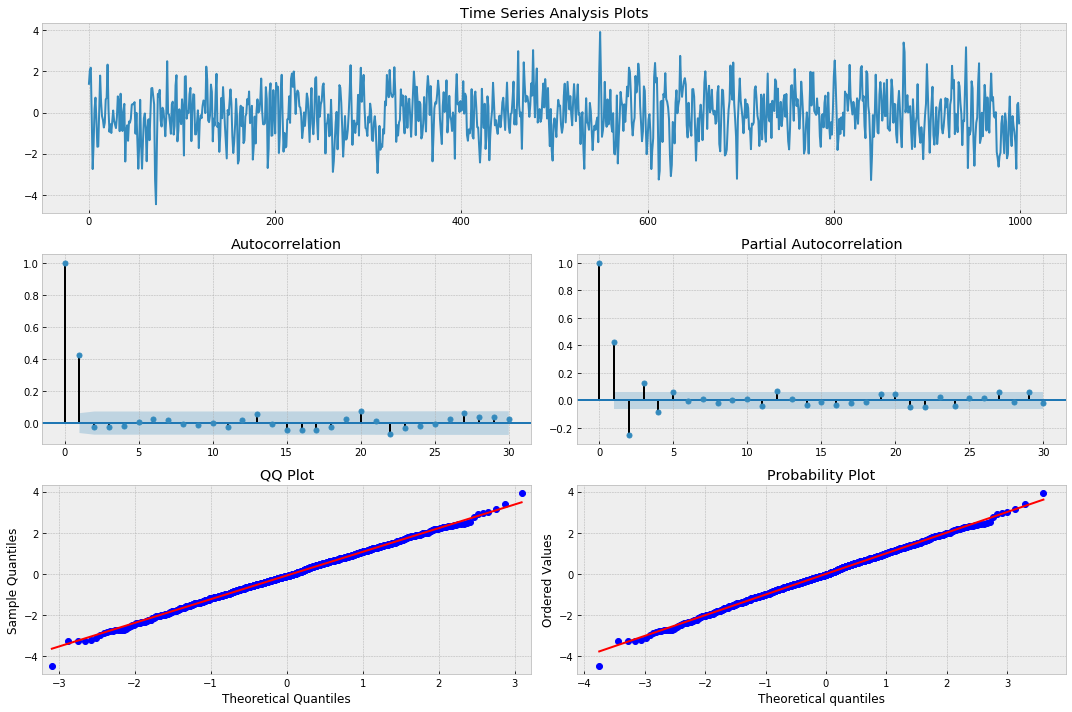

In [3]:
n = int(1000)

#Setting AR(p) alphas = 0
alphas = np.array([0.])
betas = np.array([0.6])

#Adding zero-lag and negating alphas
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma1 = smt.arma_generate_sample(ar = ar, ma = ma, nsample = n)
_ = tsplot(ma1, lags = 30)

Since this is a first order model, i.e, q = 1, there is a peak at lag 1 in ACF plot and rest of the peaks are insignificant.  By looking at the ACF of the series we can see how many sequential non zero lags exist. If there are q such lags then we can say that MA(q) model fits well at the data. 
This is similar to looking at the PACF plot for AR(p) models.

The above plot shows that MA(1) model could be an appropriate fit for the series.

**Fitting a MA(1) model on the above simulated data. **

In [4]:
max_lag = 30
model = smt.ARMA(ma1, order = (0,1)).fit(maxlag = max_lag, 
                                        method = 'mle',
                                        trend = 'nc')
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1415.750
Method:                           mle   S.D. of innovations              0.997
Date:                Fri, 22 Jun 2018   AIC                           2835.500
Time:                        02:11:24   BIC                           2845.316
Sample:                             0   HQIC                          2839.231
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.5864      0.025     23.065      0.000       0.537       0.636
                                    Roots                                    
                  Real          Imaginary           M

The lag coefficient as calculated by the model is 0.67 which is very close to real value 0.6

In [5]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(model.resid)

if pvalue < 0.10:
    print('We have reason to suspect the residuals are not normally distributed.')
else:
    print('The residuals seem normally distributed.')

The residuals seem normally distributed.


**Simulating and fitting a MA(3) process to obtain the correct betas where betas1,2,3 are equal to 0.3, 0.2 and 0.1.**

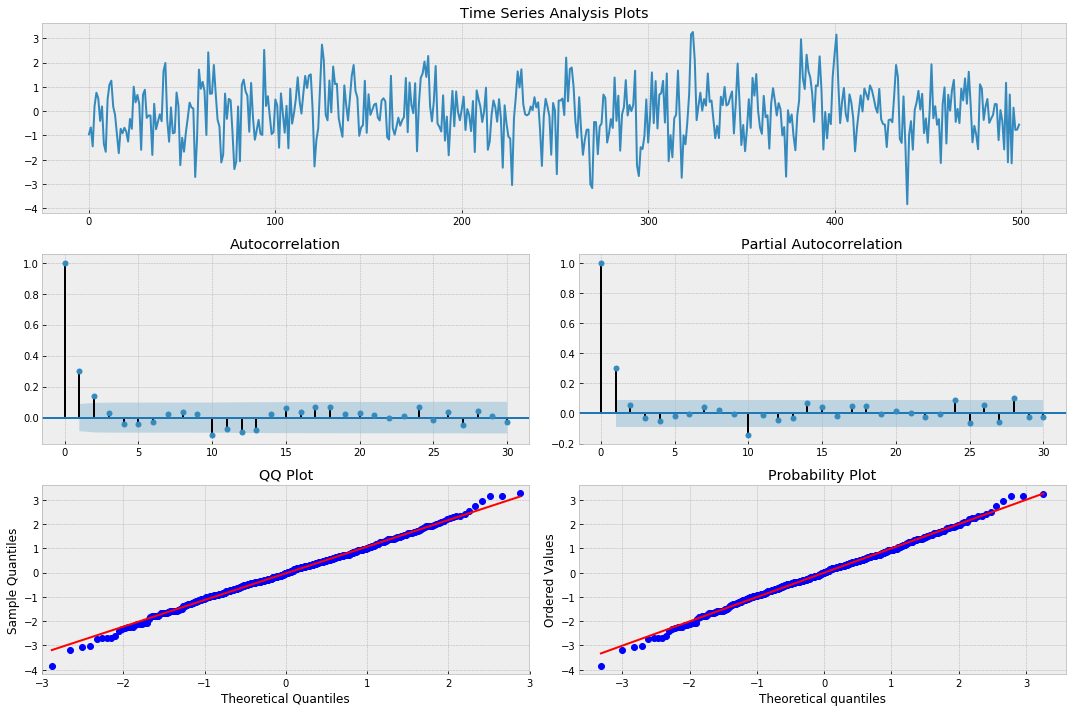

In [6]:
#We should be expecting peaks at lag 1,2,3 and the insignificant peaks beyond 3 lags in ACF plot

n = int(500)
alphas = np.array([0.])
betas = np.array([0.3, 0.2, 0.1])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma3 = smt.arma_generate_sample(ar = ar, ma = ma, nsample = n)
_ = tsplot(ma3, lags = 30)

**Fitting the MA(3) simulated time series **

In [7]:
max_lag = 30
model = smt.ARMA(ma3, order=(0, 3)).fit(maxlag=max_lag, 
                                        method='mle', 
                                        trend='nc')
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  500
Model:                     ARMA(0, 3)   Log Likelihood                -730.984
Method:                           mle   S.D. of innovations              1.044
Date:                Fri, 22 Jun 2018   AIC                           1469.968
Time:                        02:11:25   BIC                           1486.826
Sample:                             0   HQIC                          1476.583
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.2885      0.045      6.465      0.000       0.201       0.376
ma.L2.y        0.1506      0.046      3.263      0.001       0.060       0.241
ma.L3.y        0.0572      0.047      1.205      0.2

In [8]:
from statsmodels.stats.stattools import jarque_bera

score, pvalue, _, _ = jarque_bera(model.resid)

if pvalue < 0.10:
    print('We have reason to suspect the residuals are not normally distributed.')
else:
    print('The residuals seem normally distributed.')

The residuals seem normally distributed.


The model was roughly able to calculate the coefficients of errors 